# Introduction

In the following notebook, I will be testing our tuned XGBRegressor model on our Airbnb Listings data to evaluate performance

**Read in libraries**

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
sns.set(style="whitegrid")

**Set notebook preferences**

In [29]:
#Set options for pandas
pd.set_option('display.max_columns',1_000)
pd.set_option('display.max_rows',500)
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#Set options for numpy
np.set_printoptions(suppress=True)

#Set visualization preferences
plt.style.use('fivethirtyeight')
#print(plt.style.available)

#Surpress warnings
import warnings
warnings.simplefilter('ignore')

**Read in data**

In [30]:
#Set path to data
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python\In Progress\Airbnb - San Francisco\Data\04_Test_Data'

#Read in training data and labels
X_test = pd.read_csv(path + '/2020_0614_Listings_Test_Data.csv', index_col=0)
y_test = pd.read_csv(path + '/2020_0614_Listings_Test_Labels.csv', index_col=0)

**Data Overview**

In [31]:
#Display data shape and preview training data
print('Test data shape: {}\nTest labels shape:{}'.format(X_test.shape,y_test.shape))
display(X_test.head())

Test data shape: (21161, 532)
Test labels shape:(21161, 1)


,24-hour_check-in,accessible-height_bed,accessible-height_toilet,accommodates,air_conditioning,air_purifier,amazon_echo,amenities_count,availability_30,availability_365,availability_60,availability_90,baby_bath,baby_monitor,babysitter_recommendations,baking_sheet,balcony,barbecue_utensils,bath_towel,bathroom_essentials,bathrooms,bathtub,bathtub_with_bath_chair,bbq_grill,beach_essentials,beach_view,beachfront,bed_linens,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,bedroom_comforts,bedrooms,beds,bidet,body_soap,bread_maker,breakfast,breakfast_table,building_staff,buzzer/wireless_intercom,cable_tv,calculated_host_listings_count,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict 14 with grace period,cancellation_policy_super strict 30,cancellation_policy_super strict 60,carbon_monoxide_detector,cat(s),ceiling_fan,central_air_conditioning,changing_table,children’s_books_and_toys,children’s_dinnerware,city_Daly City,city_San Francisco,city_San Jose,city_South San Francisco,cleaning_before_checkout,cleaning_fee,coffee_maker,convection_oven,cooking_basics,crib,day_bed,disabled_parking_spot,dishes_and_silverware,dishwasher,dog(s),doorman,double_oven,dryer,dvd_player,electric_profiling_bed,elevator,email,en_suite_bathroom,espresso_machine,essentials,ethernet_connection,ev_charger,exercise_equipment,extra_people,extra_pillows_and_blankets,extra_space_around_bed,extra_space_around_shower_and_toilet,facebook,family/kid_friendly,fax_machine,fire_extinguisher,fire_pit,fireplace_guards,firm_mattress,first_aid_kit,fixed_grab_bars_for_shower,fixed_grab_bars_for_toilet,flat_path_to_front_door,flat_path_to_guest_entrance,formal_dining_area,free_parking_on_premises,free_street_parking,full_kitchen,game_console,garden_or_backyard,gas_oven,google,government_id,ground_floor_access,guests_included,gym,hair_dryer,hammock,handheld_shower_head,hangers,hbo_go,heat_lamps,heated_floors,heated_towel_rack,heating,high-resolution_computer_monitor,high_chair,host_greets_you,host_has_profile_pic,host_identity_verified,host_is_superhost,host_listings_count,host_response_rate,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_since_month_April,host_since_month_August,host_since_month_December,host_since_month_February,host_since_month_January,host_since_month_July,host_since_month_June,host_since_month_March,host_since_month_May,host_since_month_November,host_since_month_October,host_since_month_September,host_since_weekday_Friday,host_since_weekday_Monday,host_since_weekday_Saturday,host_since_weekday_Sunday,host_since_weekday_Thursday,host_since_weekday_Tuesday,host_since_weekday_Wednesday,host_since_year_2008.0,host_since_year_2009.0,host_since_year_2010.0,host_since_year_2011.0,host_since_year_2012.0,host_since_year_2013.0,host_since_year_2014.0,host_since_year_2015.0,host_since_year_2016.0,host_since_year_2017.0,host_since_year_2018.0,host_since_year_2019.0,host_since_year_2020.0,hot_tub,hot_water,hot_water_kettle,identity_manual,indoor_fireplace,instant_bookable,internet,iron,is_location_exact,jetted_tub,jumio,kba,keypad,kitchen,kitchenette,lake_access,laptop_friendly_workspace,last_review_month_April,last_review_month_August,last_review_month_December,last_review_month_February,last_review_month_January,last_review_month_July,last_review_month_June,last_review_month_March,last_review_month_May,last_review_month_November,last_review_month_October,last_review_month_September,last_review_weekday_Friday,last_review_weekday_Monday,last_review_weekday_Saturday,last_review_weekday_Sunday,last_review_weekday_Thursday,last_review_weekday_Tuesday,last_review_weekday_Wednesday,last_review_year_2010.0,last_review_year_2011.0,last_review_year_2012.0,last_review_year_2013.0,last_review_ye

# Deployment

**Read in trained pipeline and view details**

In [32]:
#Read in joblib
from sklearn.externals import joblib

#Set path to pipeline
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python\In Progress\Airbnb - San Francisco\Project_Codes\05_Evaluation'

#Read in pipeline
pipe = joblib.load(path + '/xgbr_regressor.pkl')

#View selector step 1
print('Selector step details: \n',pipe.steps[0])

#View model step 2
print('\nModel step details: \n',pipe.steps[1])

Selector step details: 
 ('selector', SelectFromModel(estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                                max_depth=10, max_features=None,
                                                max_leaf_nodes=None,
                                                min_impurity_decrease=0.0,
                                                min_impurity_split=None,
                                                min_samples_leaf=1,
                                                min_samples_split=2,
                                                min_weight_fraction_leaf=0.0,
                                                presort='deprecated',
                                                random_state=42,
                                                splitter='best'),
                max_features=None, norm_order=1, prefit=False,
                threshold='mean'))

Model step details: 
 ('model', XGBRegressor(base_score=0.5, booster=

### Deploy on Test Data

In [33]:
#Import models
from sklearn.model_selection import cross_val_predict

#Import Pipeline
from sklearn.pipeline import Pipeline

#Import XGB
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

#Convert training and test data into arrays
X_test = X_test.values
y_test = y_test.values

#Deploy
predictions = cross_val_predict(pipe, X_test, y_test, cv = 5, n_jobs=-1)

### Evaluate Results

In [34]:
#Read in regression_metrics
from Regression_Metrics import regression_metrics

#Evaluate
regression_metrics('XGBRegressor', X_test, y_test,predictions)

XGBRegressor Evaluation Metrics:
Adjusted R2: 0.8749194869954169
MAE: 14.879749213233517 
MSE: 15290.316948846239
RMSE: 123.6540211592257


In [36]:
print(predictions[::100])
print(y_test[::100])

[ 61.75426  153.69301  116.13161  203.75476   95.20927  152.1734
  45.190876 234.4537   222.95233   80.26864  115.53613  195.24942
  65.43429  133.28247  132.07301   67.86144  275.70673  164.10031
 147.80295   38.76166   64.671074 200.0363   119.6203   170.83229
 105.086914 103.44917  148.9243   150.59933   80.29562   55.167313
 238.73268   45.702248 133.2958   396.89285  202.4716   149.77925
 274.20953  167.50806  379.97107   39.52469  255.46988  170.09735
 210.80765   60.12453  326.31677   44.19193  236.40573  208.71236
 249.14827  175.80186  294.24478   78.66222  192.11012   95.10686
 129.89963   47.28894   61.043404 139.9265   105.18527  198.25926
 100.83738  171.11798   77.60478  423.89383   98.47263  152.61162
 398.56543   83.3237    96.29902   61.69201  173.92046  243.81044
 150.3314   267.79813   62.358814 150.00168  204.7791    69.18144
 202.87708  181.94052  214.99947  143.28838  398.11255  158.99495
 113.507965 109.01007  168.93968  112.323975 228.70563  210.02856
 451.86334

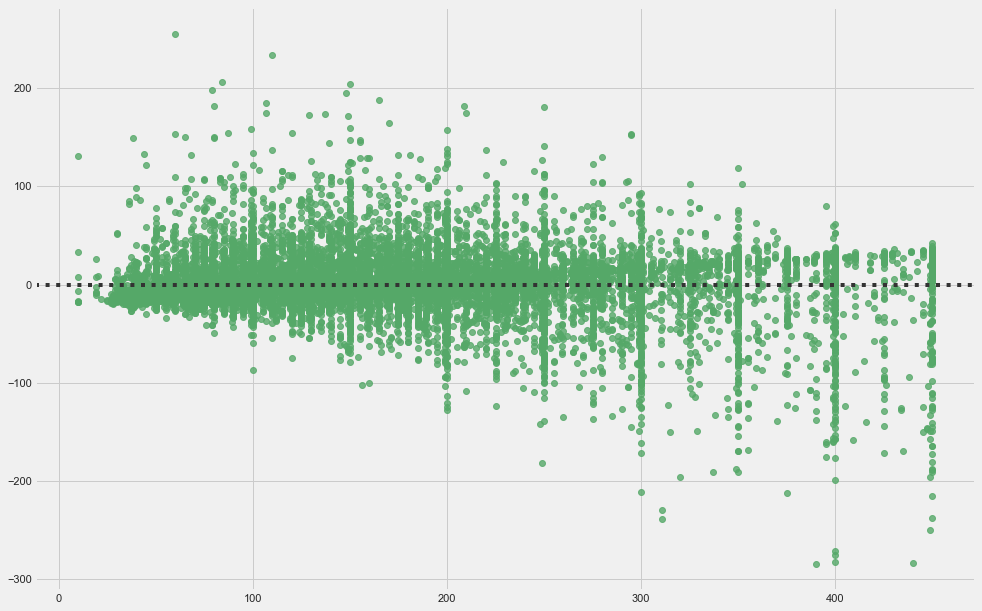

In [35]:
f,ax = plt.subplots(figsize = (15,10))

# Plot the residuals after fitting a linear model
sns.residplot(y_test, predictions,  color="g", ax=ax)

- log transform price?
- revisit data cleaning ('no review score')
- Remove Luxury airbnb properties(majority of people cant afford)